In [1]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt

from sklearn.datasets import make_circles

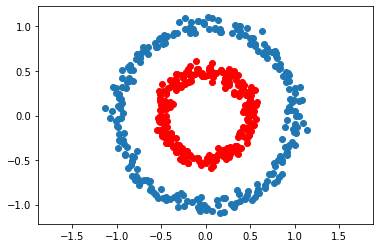

In [25]:
# Creando el dataset

n = 500
m = 2

X, Y = make_circles(n_samples=n, factor=0.5, noise=0.05)
Y = Y[:, np.newaxis]

plt.scatter(X[Y[:,0]==0,0], X[Y[:,0]==0,1])
plt.scatter(X[Y[:,0]==1,0], X[Y[:,0]==1,1], color='red')
plt.axis('equal')
plt.show()

In [66]:
# Funciones de Activacion

sigm = (lambda x: 1 / (1 + np.exp(-x)),
        lambda x: 1 * (1 - x))

relu = (lambda x: np.maximum(0, x),
        lambda x: 1)

tanh = (lambda x : np.tanh(x),
        lambda x : 1 - np.tanh(x) ** 2)

In [4]:
# Capa de la red neuronal

class Capa:    
    def __init__(self, n_conn, n_neur, act_f):
        self.act_f = act_f
        self.b = np.random.rand(1, n_neur) * 2 - 1
        self.W = np.random.rand(n_conn, n_neur) * 2 -1

In [32]:
def crear_red_neuronal(topologia, act_f):
    red_neuronal = []
    
    for i in range(len(topologia) - 1):
        red_neuronal.append(Capa(topologia[i], topologia[i+1], act_f))
    
    return red_neuronal

In [48]:
cost = (lambda Yp, Yr: np.mean((Yp - Yr) ** 2),
        lambda Yp, Yr: Yp - Yr)

def entrenar(red_neuronal, X, Y, lr=0.5, train=True):
    t = [(None, X)]
    
    # Forward pass
    for i, capa in enumerate(red_neuronal):
        z = t[-1][1] @ red_neuronal[i].W + red_neuronal[i].b
        a = red_neuronal[i].act_f[0](z)
        
        t.append((z, a))
        
    error = cost[0](t[-1][1], Y)
    
    if train:
        # Backward pass
        deltas = []
        
        for i in reversed(range(len(red_neuronal))):
            z = t[i+1][0]
            a = t[i+1][1]
            
            if i == len(red_neuronal) - 1:
                # Calcular delta ultima capa delta[0]
                deltas.insert(0, cost[1](a, Y) * red_neuronal[i].act_f[1](a))
            else:
                # Calcular delta respecto a capa previa
                deltas.insert(0, deltas[0] @ _W.T * red_neuronal[i].act_f[1](a))
                
            _W = red_neuronal[i].W
            
            # Gradiente descendiente
            red_neuronal[i].b = red_neuronal[i].b - np.mean(deltas[0], axis=0, keepdims=True) * lr
            red_neuronal[i].W = red_neuronal[i].W - t[i][1].T @ deltas[0] * lr
            
    return t[-1][1]

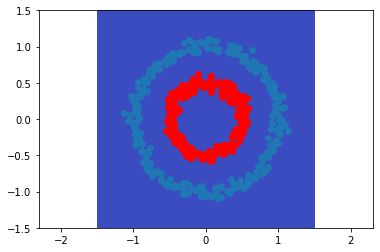

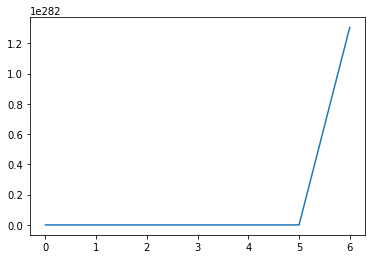

KeyboardInterrupt: 

<Figure size 432x288 with 0 Axes>

In [67]:
import time
from IPython.display import clear_output

topologia = [m, 4, 8, 1]
red_neuronal = crear_red_neuronal(topologia, relu)

costes = []

for i in range(2500):
    Yp = entrenar(red_neuronal, X, Y, lr=0.05)
    
    if i % 50 == 0:
        costes.append(cost[0](Yp, Y))
        
        res = 50
        
        _x0 = np.linspace(-1.5, 1.5, res)
        _x1 = np.linspace(-1.5, 1.5, res)
        
        _Y = np.zeros((res, res))
        
        for i, x in enumerate(_x0):
            for j, y in enumerate(_x1):
                _Y[i, j] = entrenar(red_neuronal, np.array([[x, y]]), Y, train=False)[0][0]
        
        plt.pcolormesh(_x0, _x1, _Y, cmap='coolwarm')
        plt.axis('equal')
        
        plt.scatter(X[Y[:,0]==0,0], X[Y[:,0]==0,1])
        plt.scatter(X[Y[:,0]==1,0], X[Y[:,0]==1,1], color='red')
        
        clear_output(wait=True)
        plt.show()
        
        plt.plot(range(len(costes)), costes)
        plt.show()
        